In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns


In [ ]:
# Cargar el dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Realizamos PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [ ]:
# Convertimos el resultado del PCA a un DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

In [ ]:
# Perform KMeans clustering to obtain cluster labels
kmeans = KMeans(n_clusters=3, random_state=0) # Assuming 3 clusters, adjust as needed
labels = kmeans.fit_predict(X_pca)  # Fit KMeans and get cluster assignments

new_df['cluster'] = labels # Assign the cluster labels to the 'cluster' column
new_df.head()

,PC1,PC2,cluster
0,-2.684126,0.319397,1
1,-2.714142,-0.177001,1
2,-2.888991,-0.144949,1
3,-2.745343,-0.318299,1
4,-2.728717,0.326755,1


In [ ]:
# Método del codo (Elbow Method)
inertia = []
k_values = range(1, 11)
k_values

range(1, 11)

In [ ]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_df)
    inertia.append(kmeans.inertia_)
    print(f"Inertia for k={k}: {kmeans.inertia_}")

Inertia for k=1: 666.1659556405618
Inertia for k=2: 137.15530112818413
Inertia for k=3: 63.81994202200123
Inertia for k=4: 42.22517564742998
Inertia for k=5: 35.600967387792615
Inertia for k=6: 28.248464076196676
Inertia for k=7: 24.707426163954853
Inertia for k=8: 17.984281544962798
Inertia for k=9: 16.207026352641048
Inertia for k=10: 14.939145863787745


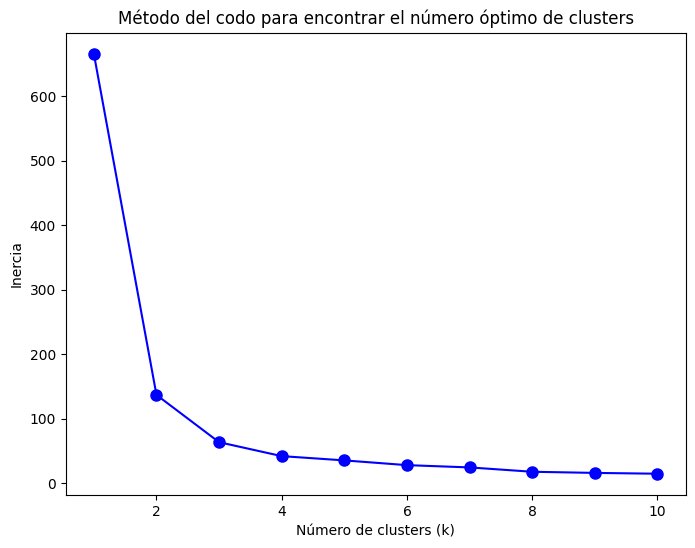

In [ ]:
# Graficamos el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()


In [ ]:
# Basándonos en el gráfico del método del codo, escogemos 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_df)

In [ ]:
# Agregamos la etiqueta de los grupos al DataFrame de PCA
X_pca_df['Cluster'] = clusters

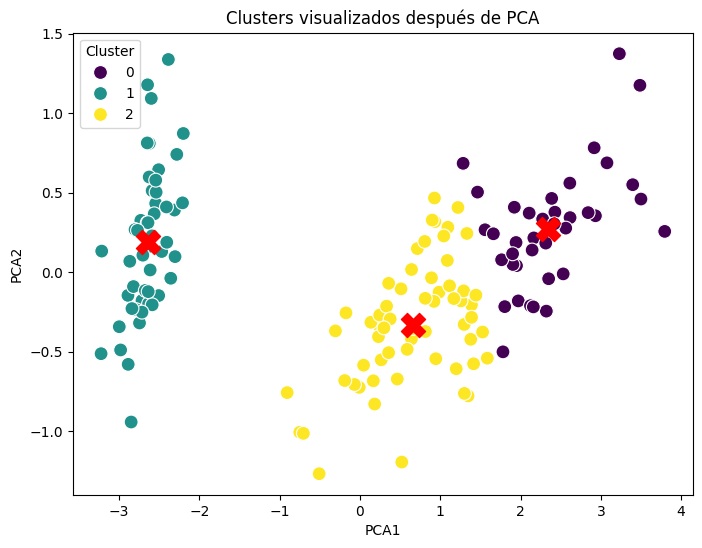

In [ ]:
# Visualizamos los clusters con un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=X_pca_df, palette='viridis', s=100)

# Añadimos las etiquetas de los centroides en el gráfico
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')

plt.title('Clusters visualizados después de PCA')
plt.show()